In [22]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df["job_posted_date"] = pd.to_datetime(df['job_posted_date'])

In [23]:
df["job_posted_date"]

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]

In [24]:
df[["job_title_short", "job_skills"]].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."


In [43]:
df_exploded = df.explode("job_skills")

<Axes: xlabel='job_skills'>

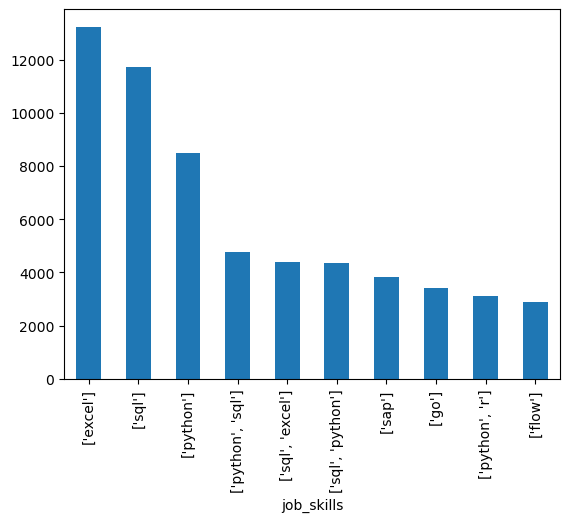

In [45]:
df_exploded["job_skills"].value_counts().head(10).plot(kind="bar")

In [32]:
skills_count = df_exploded.groupby(["job_skills", "job_title_short"]).size()

skills_count

job_skills                                                  job_title_short          
['airflow', 'confluence']                                   Data Engineer                 1
['airflow', 'datarobot', 'docker', 'kubernetes']            Senior Data Engineer          1
['airflow', 'docker', 'gitlab', 'kubernetes']               Machine Learning Engineer     1
['airflow', 'docker', 'kubernetes', 'terraform', 'gitlab']  Data Engineer                 1
['airflow', 'docker', 'kubernetes']                         Data Analyst                  1
                                                                                         ..
['zoom']                                                    Data Engineer                10
                                                            Data Scientist               43
                                                            Senior Data Analyst           2
                                                            Senior Data Scientist     

In [33]:
type(skills_count)

pandas.core.series.Series

In [36]:
df_skill_count = skills_count.reset_index(name="skill_count")

df_skill_count

,job_skills,job_title_short,skill_count
0,"['airflow', 'confluence']",Data Engineer,1
1,"['airflow', 'datarobot', 'docker', 'kubernetes']",Senior Data Engineer,1
2,"['airflow', 'docker', 'gitlab', 'kubernetes']",Machine Learning Engineer,1
3,"['airflow', 'docker', 'kubernetes', 'terraform...",Data Engineer,1
4,"['airflow', 'docker', 'kubernetes']",Data Analyst,1
...,...,...,...
215215,['zoom'],Data Engineer,10
215216,['zoom'],Data Scientist,43
215217,['zoom'],Senior Data Analyst,2
215218,['zoom'],Senior Data Scientist,2


In [40]:
df_skill_count = df_skill_count.sort_values(by="skill_count", ascending=False)

df_skill_count

,job_skills,job_title_short,skill_count
16110,['excel'],Data Analyst,8095
208186,['sql'],Data Analyst,4997
116092,['python'],Data Scientist,4659
146457,"['sql', 'excel']",Data Analyst,3020
16108,['excel'],Business Analyst,2443
...,...,...,...
14654,"['excel', 'ms access', 'spss']",Data Scientist,1
12160,"['c++', 'rust', 'python', 'aws', 'flask', 'dja...",Data Scientist,1
14650,"['excel', 'ms access', 'sap']",Business Analyst,1
14648,"['excel', 'ms access', 'powerpoint']",Senior Data Scientist,1


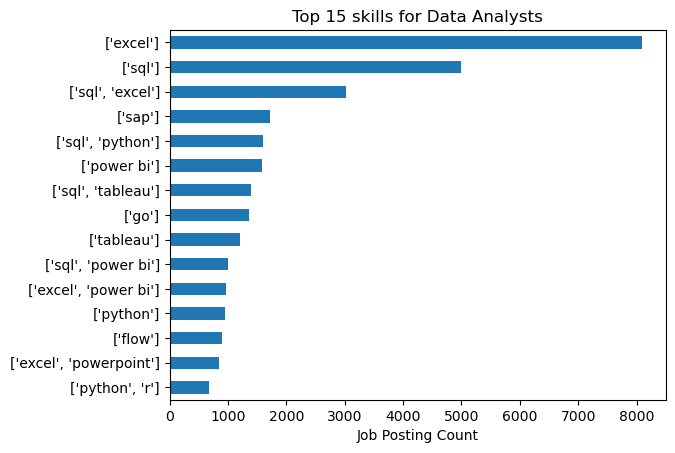

In [51]:
job_title = "Data Analyst"
top_skills = 15

df_skill_final = df_skill_count[df_skill_count["job_title_short"] == job_title].head(top_skills)

df_skill_final.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} skills for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()